In [2]:
import sys

sys.path.insert(0, "./../")

import os

import tensorflow as tf
from tf_clahe import clahe
import matplotlib.pyplot as plt

c:\Users\Bugi\miniconda3\envs\modeling\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Bugi\miniconda3\envs\modeling\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.

In [9]:
path_data = "./../../../dataset_used/"
path_img = os.path.join(path_data, "fundus_image")
path_mask = os.path.join(path_data, "mask_image")
path_aug = os.path.join(path_data, "aug_image")

In [10]:
try:
    os.mkdir(path_aug)
except FileExistsError:
    pass

In [12]:
images = os.listdir(path_img)
masks = os.listdir(path_mask)

In [13]:
sample_img = os.path.join(path_img, images[0])
sample_mask = os.path.join(path_mask, masks[0])

In [14]:
image = tf.io.read_file(sample_img)
mask = tf.io.read_file(sample_mask)

In [15]:
image = tf.image.decode_jpeg(image, channels=3)
mask = tf.image.decode_png(mask, channels=1)

In [19]:
image = tf.image.resize(image, (512, 512), method="nearest")
mask = tf.image.resize(mask, (512, 512), method="nearest")

In [20]:
clahe_image = clahe(image, clip_limit=1.5)

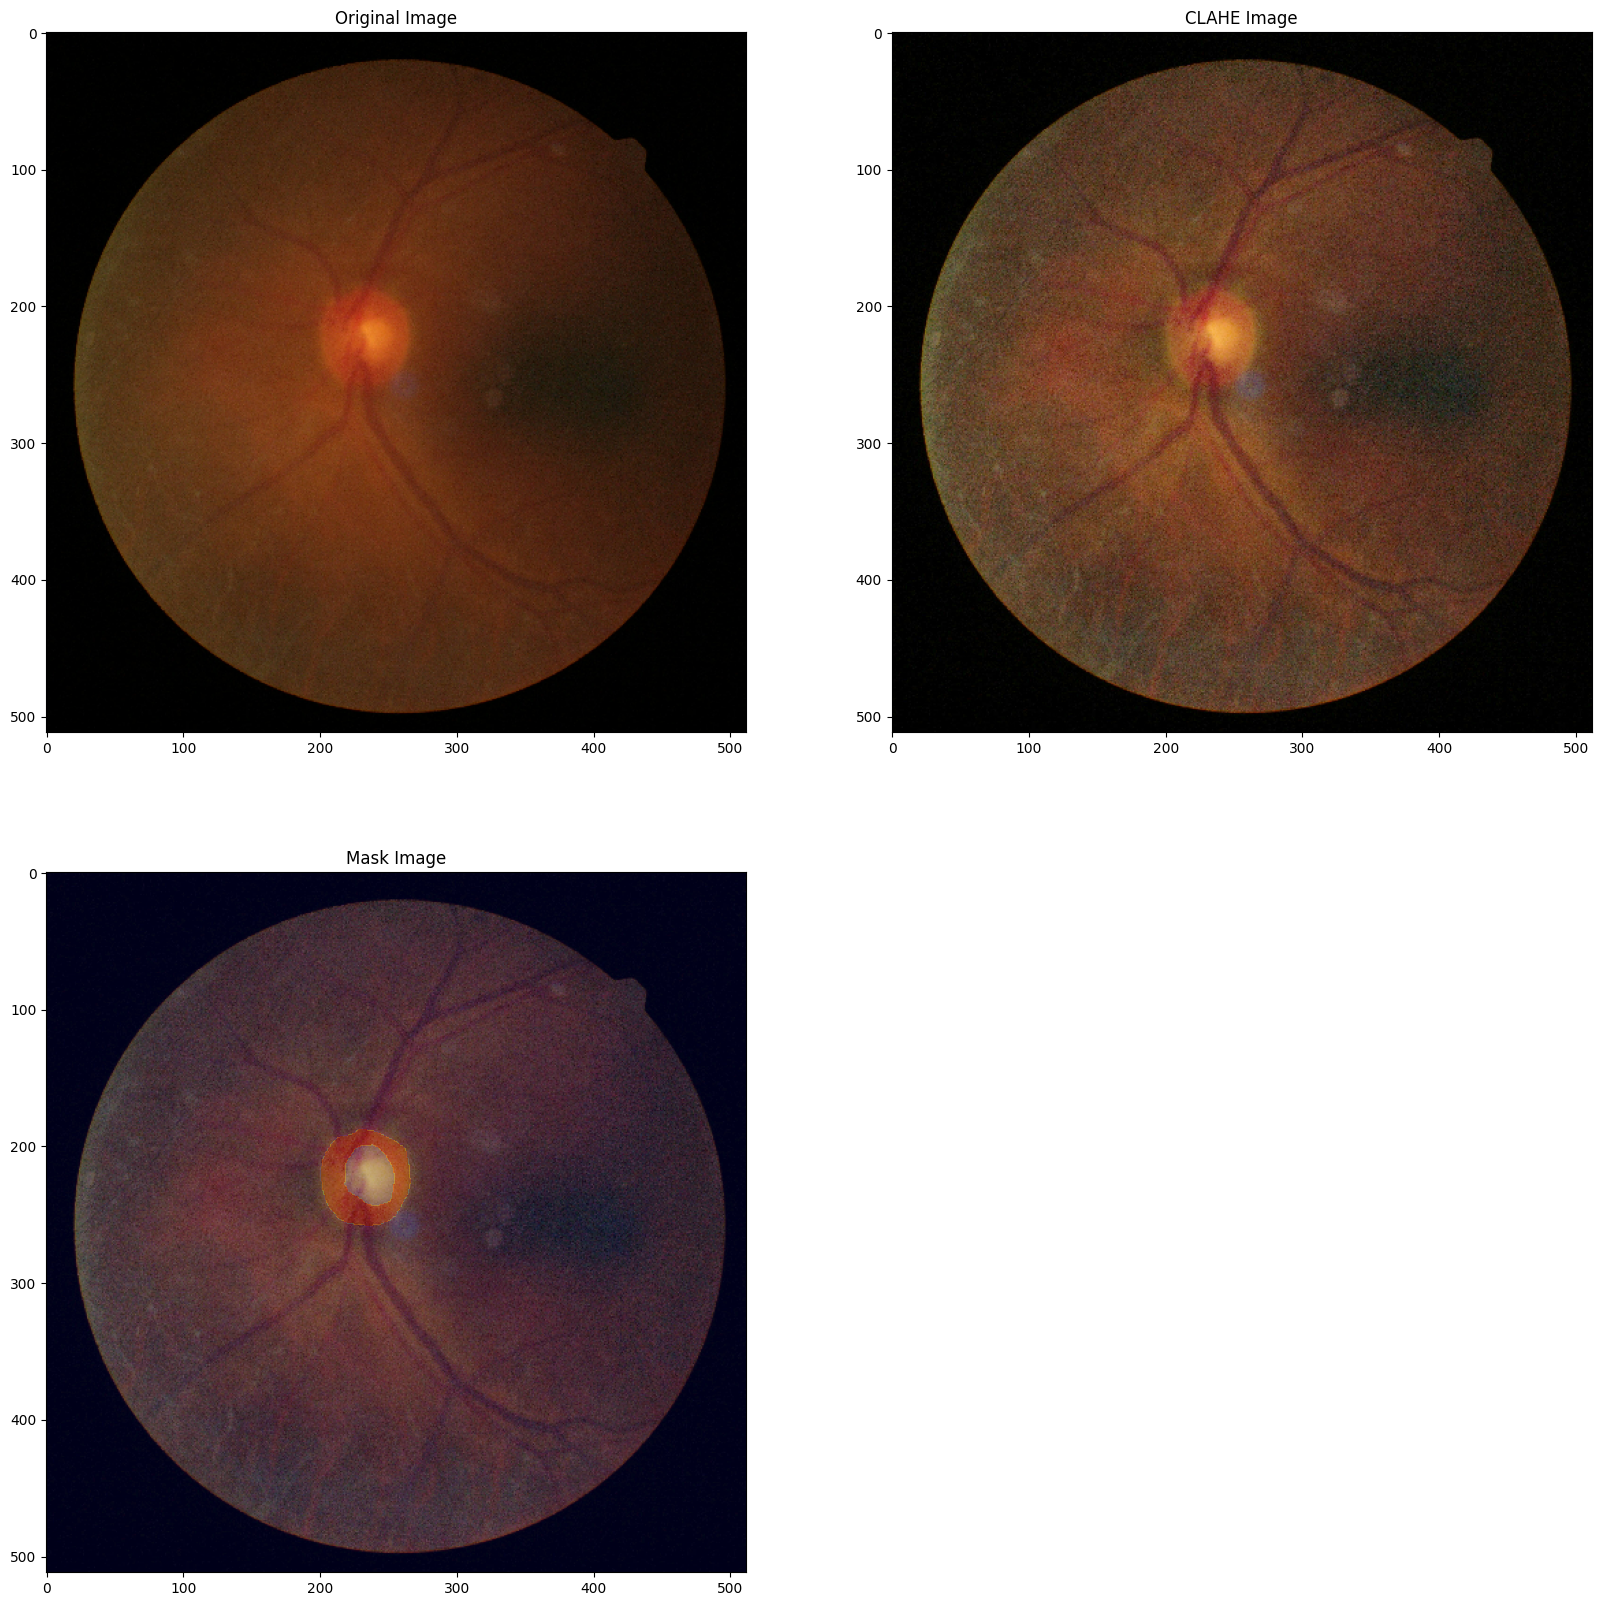

In [28]:
plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(clahe_image)
plt.title("CLAHE Image")

plt.subplot(2, 2, 3)
plt.imshow(clahe_image)
plt.imshow(mask, cmap="jet", alpha=0.2)
plt.title("Mask Image")

plt.show()

In [19]:
tf.keras.utils.save_img(os.path.join(path_aug, "clahe.jpg"), clahe_image)